# Section 4: Pandas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns

%matplotlib inline

## Series
A Series object is like a Numpy array, but with explicitly defined indices.

In [22]:
num_list = np.random.randn(5)
alpha_list = list('abcde')
my_series = pd.Series(num_list)
print(my_series) # notice Series objects are displayed as column vectors rather than row vectors; index is printed
print()

my_series.index = list('abcde')
print(my_series)
print()

print(my_series.index[2])
my_series.index[2] = 'f' # indicies are immutable; to change an index, overwrite the whole index

0   -1.177031
1   -0.998817
2   -0.518900
3   -1.074218
4    0.143309
dtype: float64

a   -1.177031
b   -0.998817
c   -0.518900
d   -1.074218
e    0.143309
dtype: float64

c


TypeError: Index does not support mutable operations

In [23]:
my_series.index = pd.date_range('2017-05-01', freq = 'D', periods = 5)
print(my_series)

2017-05-01   -1.177031
2017-05-02   -0.998817
2017-05-03   -0.518900
2017-05-04   -1.074218
2017-05-05    0.143309
Freq: D, dtype: float64


## DataFrame construction
A DataFrame is a collection of Series sharing the same index.

In [40]:
# Construct DataFrame from Numpy matrix
data = np.array([[1,2,3],
                 [4,5,6],
                 [7,8,9]])
df = pd.DataFrame(data)
print(df,'\n')

df.columns = ['column_' + str(j) for j in range(3)]
df.index = ['row_' + str(i) for i in range(3)]
print(df, '\n')

# Can do the above all within the constructor
df = pd.DataFrame(data, columns = ['column_' + str(j) for j in range(3)], index = ['row_' + str(i) for i in range(3)])
print(df)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9 

       column_0  column_1  column_2
row_0         1         2         3
row_1         4         5         6
row_2         7         8         9 

       column_0  column_1  column_2
row_0         1         2         3
row_1         4         5         6
row_2         7         8         9


In [45]:
# Construct DataFrame from dictionary
list1 = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
list2 = np.floor(np.random.randn(7) * 10)
list3 = [bool(i % 2) for i in list2]

data = dict(days=list1, numbers=list2, is_odd=list3)
print(data, '\n')

df = pd.DataFrame(data)
print(df , '\n')

{'is_odd': [True, True, True, True, False, False, True], 'days': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 'numbers': array([  7., -13.,   9., -11.,  -2.,  34.,  21.])} 

        days is_odd  numbers
0     Monday   True      7.0
1    Tuesday   True    -13.0
2  Wednesday   True      9.0
3   Thursday   True    -11.0
4     Friday  False     -2.0
5   Saturday  False     34.0
6     Sunday   True     21.0 



### setting a DataFrame column as an index

In [47]:
print(df, '\n')

df = df.set_index('days')
print(df, '\n')

        days is_odd  numbers
0     Monday   True      7.0
1    Tuesday   True    -13.0
2  Wednesday   True      9.0
3   Thursday   True    -11.0
4     Friday  False     -2.0
5   Saturday  False     34.0
6     Sunday   True     21.0 

          is_odd  numbers
days                     
Monday      True      7.0
Tuesday     True    -13.0
Wednesday   True      9.0
Thursday    True    -11.0
Friday     False     -2.0
Saturday   False     34.0
Sunday      True     21.0 



## Reading from a CSV

In [85]:
df = pd.read_csv('cars.csv')
df.head()

,Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0,STRING;DOUBLE;INT;DOUBLE;DOUBLE;DOUBLE;DOUBLE;...
1,Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3...
2,Buick Skylark 320;15.0;8;350.0;165.0;3693.;11....
3,Plymouth Satellite;18.0;8;318.0;150.0;3436.;11...
4,AMC Rebel SST;16.0;8;304.0;150.0;3433.;12.0;70;US


In [86]:
df = pd.read_csv('cars.csv', delimiter = ';')
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US


In [87]:
df = pd.read_csv('cars.csv', delimiter = ';', skiprows = [1])
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [88]:
df.columns = df.columns.str.lower()
df.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


## DataFrame access

### head() and tail()

In [89]:
df.head(6)

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
5,Ford Galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,US


In [90]:
df.tail(7)

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
399,Dodge Charger 2.2,36.0,4,135.0,84.0,2370.0,13.0,82,US
400,Chevrolet Camaro,27.0,4,151.0,90.0,2950.0,17.3,82,US
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US
405,Chevy S-10,31.0,4,119.0,82.0,2720.0,19.4,82,US


### Column access

In [91]:
# Accessing a column via member access operator '.'
# Can cause naming collisions. What if column was was 'count' or 'size'?
print(df.mpg.head(), '\n')

# Accessing a column via brackets
# This is useful when column name has a space character
print(df['mpg'].head(), '\n')

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64 

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64 



### Accessing multiple columns returns a new DataFrame

In [92]:
df_temp = df[['mpg','cylinders','weight']].head()
df_temp

,mpg,cylinders,weight
0,18.0,8,3504.0
1,15.0,8,3693.0
2,18.0,8,3436.0
3,16.0,8,3433.0
4,17.0,8,3449.0


Row access does not work with single pair of brackets (most of the time) because first pair is reserved for column access

### loc()

In [111]:
df_temp = df.loc[3, ['mpg','weight']] # Access rows first then columns
df_temp

mpg         16
weight    3433
Name: 3, dtype: object

In [113]:
df_temp = df.loc[:, ['mpg','weight','displacement']]
df_temp.head()

,mpg,weight,displacement
0,18.0,3504.0,307.0
1,15.0,3693.0,350.0
2,18.0,3436.0,318.0
3,16.0,3433.0,304.0
4,17.0,3449.0,302.0


In [116]:
df_temp = df.loc[2:6,'displacement':'acceleration']
df_temp

,displacement,horsepower,weight,acceleration
2,318.0,150.0,3436.0,11.0
3,304.0,150.0,3433.0,12.0
4,302.0,140.0,3449.0,10.5
5,429.0,198.0,4341.0,10.0
6,454.0,220.0,4354.0,9.0


### iloc()

In [119]:
df_temp = df.iloc[2:10:2,3:7]
df_temp

,displacement,horsepower,weight,acceleration
2,318.0,150.0,3436.0,11.0
4,302.0,140.0,3449.0,10.5
6,454.0,220.0,4354.0,9.0
8,455.0,225.0,4425.0,10.0


## Boolean indexing

In [354]:
print(df.median())
df[(df.mpg > 23) & ~(df.model > 76)].head() # parenthesis required for operator precedence.
                                            # note the use of '&' instead of 'and' keyword and '~' instead of '!'

mpg                  23.00
cylinders             4.00
displacement        151.00
horsepower           95.00
weight             2822.50
acceleration         15.50
model                76.00
hp_per_cylinder      18.75
is_car                1.00
example                NaN
dtype: float64


,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
20,Toyota Corolla Mark ii,24.0,4,113.0,95.0,2372.0,15.0,70,Japan,23.75,True,NaN
24,Datsun PL510,27.0,4,97.0,88.0,2130.0,14.5,70,Japan,22.00,True,NaN
25,Volkswagen 1131 Deluxe Sedan,26.0,4,97.0,46.0,1835.0,20.5,70,Europe,11.50,True,NaN
26,Peugeot 504,25.0,4,110.0,87.0,2672.0,17.5,70,Europe,21.75,True,NaN
27,Audi 100 LS,24.0,4,107.0,90.0,2430.0,14.5,70,Europe,22.50,True,NaN


## Assignment operator only copies references

In [127]:
print(df.head(), '\n')
df_temp = df
df_temp.model = 0
print(df.head())

                         car   mpg  cylinders  displacement  horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   weight  acceleration  model origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  3433.0          12.0     70     US  
4  3449.0          10.5     70     US   

                         car   mpg  cylinders  displacement  horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3      

In [265]:
df = pd.read_csv('cars.csv', delimiter = ';', skiprows = [1])
df.columns = df.columns.str.lower()
temp_df = df.copy()
temp_df['model'] = 0
print(temp_df.head(), '\n')
print(df.head(), '\n')

                         car   mpg  cylinders  displacement  horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   weight  acceleration  model origin  
0  3504.0          12.0      0     US  
1  3693.0          11.5      0     US  
2  3436.0          11.0      0     US  
3  3433.0          12.0      0     US  
4  3449.0          10.5      0     US   

                         car   mpg  cylinders  displacement  horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3      

## Sorting

### sorting by values

In [266]:
df_temp = df.sort_values(by = 'weight')
df_temp.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
61,Datsun 1200,35.0,4,72.0,69.0,1613.0,18.0,71,Japan
151,Toyota Corolla,31.0,4,76.0,52.0,1649.0,16.5,74,Japan
350,Toyota Starlet,39.1,4,79.0,58.0,1755.0,16.9,81,Japan
352,Honda Civic 1300,35.1,4,81.0,60.0,1760.0,16.1,81,Japan
60,Toyota Corolla 1200,31.0,4,71.0,65.0,1773.0,19.0,71,Japan


### heirarchical sorting by values

In [267]:
df_temp = df.sort_values(by = ['cylinders','displacement'])
df_temp.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
78,Mazda RX2 Coupe,19.0,3,70.0,97.0,2330.0,13.5,72,Japan
118,Mazda RX3,18.0,3,70.0,90.0,2124.0,13.5,73,Japan
341,Mazda RX-7 GS,23.7,3,70.0,100.0,2420.0,12.5,80,Japan
250,Mazda RX-4,21.5,3,80.0,110.0,2720.0,13.5,77,Japan
124,Fiat 128,29.0,4,68.0,49.0,1867.0,19.5,73,Europe


### sorting by index

In [268]:
df_temp = df.sort_index(ascending = False)
df_temp.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
405,Chevy S-10,31.0,4,119.0,82.0,2720.0,19.4,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US


### sorting by column

In [269]:
df_temp = df[df.columns.sort_values()]
df_temp.head()

,acceleration,car,cylinders,displacement,horsepower,model,mpg,origin,weight
0,12.0,Chevrolet Chevelle Malibu,8,307.0,130.0,70,18.0,US,3504.0
1,11.5,Buick Skylark 320,8,350.0,165.0,70,15.0,US,3693.0
2,11.0,Plymouth Satellite,8,318.0,150.0,70,18.0,US,3436.0
3,12.0,AMC Rebel SST,8,304.0,150.0,70,16.0,US,3433.0
4,10.5,Ford Torino,8,302.0,140.0,70,17.0,US,3449.0


## Structural manipulation

### adding a new column

In [270]:
df['hp_per_cylinder'] = df.horsepower / df.cylinders
df.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500


### adding a new column via broadcasting

In [271]:
df['is_car'] = True
df.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250,True
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750,True
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500,True


### dropping columns

In [272]:
df_temp = df.drop(['is_car','hp_per_cylinder'], axis = 'columns')
df_temp.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [273]:
df_temp = df.drop([0,2,4], axis = 'rows')
df_temp.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True
5,Ford Galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,US,24.750,True
6,Chevrolet Impala,14.0,8,454.0,220.0,4354.0,9.0,70,US,27.500,True
7,Plymouth Fury iii,14.0,8,440.0,215.0,4312.0,8.5,70,US,26.875,True


### concatenating DataFrames by column

In [274]:
new1 = np.zeros(len(df))
new2 = np.ones(len(df))
new_df = pd.DataFrame(dict(new_col1 = new1, new_col2 = new2))
new_df.tail()

,new_col1,new_col2
401,0.0,1.0
402,0.0,1.0
403,0.0,1.0
404,0.0,1.0
405,0.0,1.0


In [275]:
df_merged = pd.concat([df, new_df], axis = 'columns')
df_merged.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,new_col1,new_col2
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250,True,0.0,1.0
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True,0.0,1.0
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750,True,0.0,1.0
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True,0.0,1.0
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500,True,0.0,1.0


## Descriptive statistics

### info()
provides information on number of non-null columns and data types for each column

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
car                406 non-null object
mpg                406 non-null float64
cylinders          406 non-null int64
displacement       406 non-null float64
horsepower         406 non-null float64
weight             406 non-null float64
acceleration       406 non-null float64
model              406 non-null int64
origin             406 non-null object
hp_per_cylinder    406 non-null float64
is_car             406 non-null bool
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 32.2+ KB


### describe()

In [277]:
df.describe() # notice how non-numerical features are ignored; also, there is something strange about this data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,hp_per_cylinder
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182,18.935406
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737,4.477849
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000,16.666667
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000,18.750000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000,21.843750
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,36.666667


In [278]:
df = df.applymap(lambda x: np.nan if x == 0 else x)
df.describe() # aggregations automatically 

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,hp_per_cylinder
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,400.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,19.219438
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,3.857467
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,11.250000
25%,NaN,4.000000,105.000000,NaN,2226.500000,13.700000,73.000000,NaN
50%,NaN,4.000000,151.000000,NaN,2822.500000,15.500000,76.000000,NaN
75%,NaN,8.000000,302.000000,NaN,3618.250000,17.175000,79.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,36.666667


### applying an aggregation on a Series produces a value

In [279]:
print('Mean MPG:', df.mpg.mean())
print('Median MPG:', df.mpg.mean())
print('Mode MPG:', df.mpg.mode())
print('Std MPG:', df.mpg.std())
print('Max MPG:', df.mpg.max())
print('Min MPG:', df.mpg.min())
print('IRQ weight:', df.weight.quantile(.75) - df.weight.quantile(.25))

Mean MPG: 23.514572864321615
Median MPG: 23.514572864321615
Mode MPG: 0    13.0
dtype: float64
Std MPG: 7.815984312565782
Max MPG: 46.6
Min MPG: 9.0
IRQ weight: 1391.75


### applying an aggregation on a DataFrame produces a Series

In [280]:
print(df.mean())

mpg                  23.514573
cylinders             5.475369
displacement        194.779557
horsepower          105.082500
weight             2979.413793
acceleration         15.519704
model                75.921182
hp_per_cylinder      19.219438
is_car                1.000000
dtype: float64


### unique()

In [324]:
df.origin.unique()

array(['US', 'Europe', 'Japan'], dtype=object)

### value_counts()

In [326]:
df.origin.value_counts()

US        254
Japan      79
Europe     73
Name: origin, dtype: int64

## Value manipulation

### replace()

In [302]:
df_temp = df.copy()
print(df_temp.origin.unique())
df_temp.origin = df_temp.origin.replace(df_temp.origin.unique(), [1,2,3])
df_temp.tail()

['US' 'Europe' 'Japan']


,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,1,21.50,True,NaN
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,2,13.00,True,NaN
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,1,21.00,True,NaN
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,1,19.75,True,NaN
405,Chevy S-10,31.0,4,119.0,82.0,2720.0,19.4,82,1,20.50,True,NaN


### apply() on a Series takes a function that maps a value to a value

In [281]:
df_temp = df.copy()
df_temp.weight = df_temp.weight.apply(lambda x: (x - df_temp.weight.mean()) / df_temp.weight.std())
df_temp.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,0.619343,12.0,70,US,16.250,True
1,Buick Skylark 320,15.0,8,350.0,165.0,0.842482,11.5,70,US,20.625,True
2,Plymouth Satellite,18.0,8,318.0,150.0,0.539060,11.0,70,US,18.750,True
3,AMC Rebel SST,16.0,8,304.0,150.0,0.535518,12.0,70,US,18.750,True
4,Ford Torino,17.0,8,302.0,140.0,0.554408,10.5,70,US,17.500,True


### apply() on a DataFrame takes a function that maps a Series to a value

In [282]:
df_temp = df._get_numeric_data().apply(lambda series: series.quantile(.75) - series.quantile(.25))
df_temp

mpg                  12.225000
cylinders             4.000000
displacement        197.000000
horsepower           53.000000
weight             1391.750000
acceleration          3.475000
model                 6.000000
hp_per_cylinder       5.177083
is_car                0.000000
dtype: float64

### applymap() only works on a DataFrame and maps a value to a value

In [283]:
df_temp = df._get_numeric_data().applymap(lambda x: np.nan if x == np.nan else str(x))
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg                406 non-null object
cylinders          406 non-null object
displacement       406 non-null object
horsepower         406 non-null object
weight             406 non-null object
acceleration       406 non-null object
model              406 non-null object
hp_per_cylinder    406 non-null object
is_car             406 non-null object
dtypes: object(9)
memory usage: 28.6+ KB


### map() only works on an Index and maps a value to a value

In [284]:
df_temp = df.copy()
df_temp.index = df_temp.index.map(lambda x: x * 2)
df_temp.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250,True
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True
4,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750,True
6,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True
8,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500,True


## Missing values

### isnull()

In [285]:
print(df.mpg.isnull().head(15), '\n')
print('Number of null values in MPG column:', sum(df.mpg.isnull()))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13     True
14     True
Name: mpg, dtype: bool 

Number of null values in MPG column: 8


### notnull()

In [286]:
print(df.mpg.notnull().head(15), '\n')
print('Number of non-null values in MPG column:', sum(df.mpg.notnull()))

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13    False
14    False
Name: mpg, dtype: bool 

Number of non-null values in MPG column: 398


### any() and all()

In [287]:
df.isnull().head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [288]:
print(df.isnull().any(axis = 'rows'), '\n') # any() takes a Series and sees if it has any True's.
                         # When applied to a DataFrame, it returns a Series.
print(df.notnull().all(axis = 'columns').head()) # all() takes a Series and sees if it has all True's.

car                False
mpg                 True
cylinders          False
displacement       False
horsepower          True
weight             False
acceleration       False
model              False
origin             False
hp_per_cylinder     True
is_car             False
dtype: bool 

0    True
1    True
2    True
3    True
4    True
dtype: bool


### dropna() on a Series returns a Series without null values

In [289]:
print(len(df.mpg))
print(len(df.mpg.dropna()))

406
398


### dropna() on a DataFrame requires specifications

In [290]:
print(df.shape)
print(df.dropna(how = 'any', axis = 'rows').shape, '\n')
df['example'] = np.nan
print(df.shape)
print(df.dropna(how = 'all', axis = 'columns').shape)

(406, 11)
(392, 11)
(406, 11)


### replace missing values with fillna()

In [292]:
df.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250,True,NaN
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True,NaN
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750,True,NaN
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True,NaN
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500,True,NaN


In [294]:
df.fillna(0).head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250,True,0.0
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True,0.0
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750,True,0.0
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True,0.0
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500,True,0.0


## Grouping

In [315]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### groupby() + aggregator

In [337]:
print(titanic.groupby('sex').size(), '\n')
print(titanic.groupby(['class','sex']).size(), '\n')
print(titanic.groupby(['class','sex']).mean(), '\n')

sex
female    314
male      577
dtype: int64 

class   sex   
First   female     94
        male      122
Second  female     76
        male      108
Third   female    144
        male      347
dtype: int64 

               survived  pclass        age     sibsp     parch        fare  \
class  sex                                                                   
First  female  0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       male    0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
Second female  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       male    0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
Third  female  0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
       male    0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
class  sex                           
First  female    0.000000  0.361702  
       male      0.975410  0.614754  
Second female 

### unstack()

In [340]:
titanic.groupby(['class','sex']).mean()['survived']

class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [342]:
titanic.groupby(['class','sex']).mean()['survived'].unstack('class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## String functions

### str.startswith(), str.endswith(), str.contains()

In [344]:
df.head()

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250,True,NaN
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True,NaN
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750,True,NaN
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True,NaN
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500,True,NaN


In [357]:
df[df.car.str.startswith('Honda')]

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
156,Honda Civic,24.0,4,120.0,97.0,2489.0,15.0,74,Japan,24.25,True,NaN
188,Honda Civic CVCC,33.0,4,91.0,53.0,1795.0,17.5,75,Japan,13.25,True,NaN
205,Honda Civic,33.0,4,91.0,53.0,1795.0,17.4,76,Japan,13.25,True,NaN
223,Honda Accord CVCC,31.5,4,98.0,68.0,2045.0,18.5,77,Japan,17.00,True,NaN
255,Honda Civic CVCC,36.1,4,91.0,60.0,1800.0,16.4,78,Japan,15.00,True,NaN
286,Honda Accord LX,29.5,4,98.0,68.0,2135.0,16.6,78,Japan,17.00,True,NaN
336,Honda Civic 1500 gl,44.6,4,91.0,67.0,1850.0,13.8,80,Japan,16.75,True,NaN
344,Honda Accord,32.4,4,107.0,72.0,2290.0,17.0,80,Japan,18.00,True,NaN
352,Honda Civic 1300,35.1,4,81.0,60.0,1760.0,16.1,81,Japan,15.00,True,NaN
362,Honda Prelude,33.7,4,107.0,75.0,2210.0,14.4,81,Japan,18.75,True,NaN


In [359]:
df[df.car.str.endswith('Civic')]

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
156,Honda Civic,24.0,4,120.0,97.0,2489.0,15.0,74,Japan,24.25,True,NaN
205,Honda Civic,33.0,4,91.0,53.0,1795.0,17.4,76,Japan,13.25,True,NaN
391,Honda Civic,38.0,4,91.0,67.0,1965.0,15.0,82,Japan,16.75,True,NaN


In [360]:
df[df.car.str.contains('Civic')]

,car,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,hp_per_cylinder,is_car,example
156,Honda Civic,24.0,4,120.0,97.0,2489.0,15.0,74,Japan,24.25,True,NaN
188,Honda Civic CVCC,33.0,4,91.0,53.0,1795.0,17.5,75,Japan,13.25,True,NaN
205,Honda Civic,33.0,4,91.0,53.0,1795.0,17.4,76,Japan,13.25,True,NaN
255,Honda Civic CVCC,36.1,4,91.0,60.0,1800.0,16.4,78,Japan,15.00,True,NaN
336,Honda Civic 1500 gl,44.6,4,91.0,67.0,1850.0,13.8,80,Japan,16.75,True,NaN
352,Honda Civic 1300,35.1,4,81.0,60.0,1760.0,16.1,81,Japan,15.00,True,NaN
391,Honda Civic,38.0,4,91.0,67.0,1965.0,15.0,82,Japan,16.75,True,NaN
392,Honda Civic (auto),32.0,4,91.0,67.0,1965.0,15.7,82,Japan,16.75,True,NaN


### upper() and lower()

In [364]:
df_temp = df.copy()
df_temp.car = df_temp.car.str.lower()
df_temp.columns = df_temp.columns.str.upper()
df_temp.head()

,CAR,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL,ORIGIN,HP_PER_CYLINDER,IS_CAR,EXAMPLE
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,16.250,True,NaN
1,buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,20.625,True,NaN
2,plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,18.750,True,NaN
3,amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,US,18.750,True,NaN
4,ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.500,True,NaN


## Plotting

### line plots

In [376]:
mortality = pd.read_csv('http://timeseries.weebly.com/uploads/2/1/0/8/21086414/_births_and_deaths.csv',
                  index_col = 'Quarter')
mortality.head()

,Male Live Births,Female Live Births,Male Deaths,Female Deaths
Quarter,,,,
2000Q1,7639,7139,3346,3070
2000Q2,7365,6866,3372,3178
2000Q3,7174,6843,3675,3511
2000Q4,6979,6600,3357,3151
2001Q1,7496,7232,3231,3070


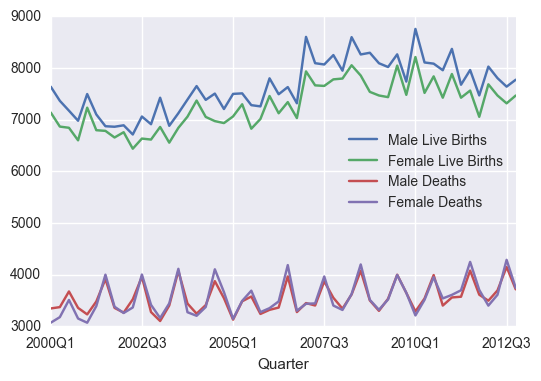

In [377]:
mortality.plot(kind = 'line') # plot() default is a line plot with multiple numeric features on the same axis

### bar plot

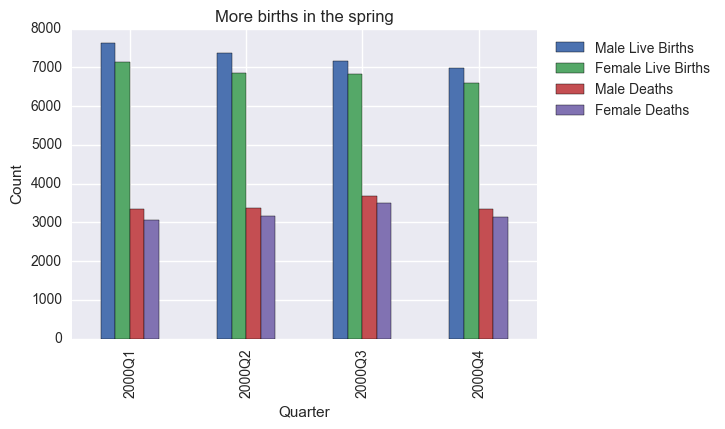

In [389]:
ax = mortality.loc['2000Q1':'2000Q4',:].plot(kind = 'bar', title = 'More births in the spring')
# plot functions in pandas return an axis to which you can make further changes
ax.legend(bbox_to_anchor = (1.4,1))
ax.set_ylabel('Count')

### scatter plot

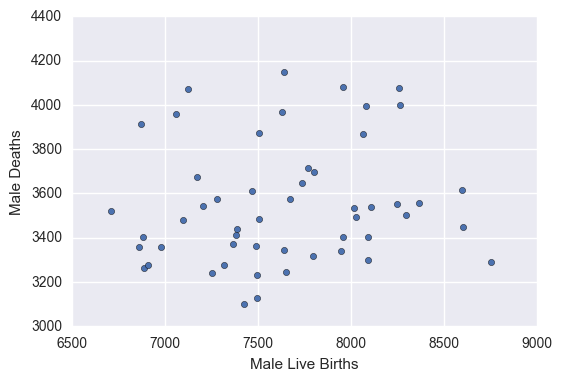

In [398]:
ax = mortality.plot(kind = 'scatter', x = 'Male Live Births', y = 'Male Deaths')

### box plot

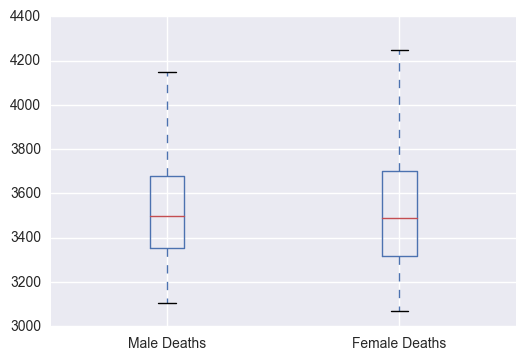

In [400]:
mortality.plot(kind = 'box', x = ['Male Live Births','Female Live Births'])

### histogram

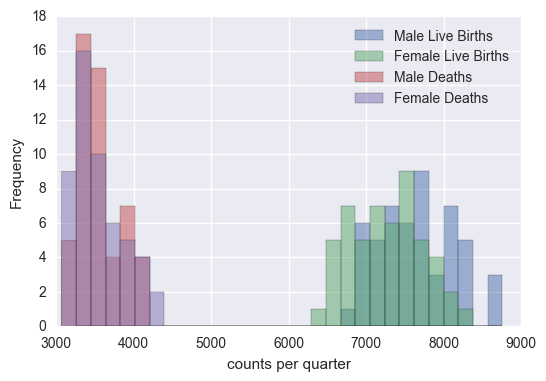

In [395]:
ax = mortality.plot(kind = 'hist', bins = 30, alpha = 0.5)
ax.set_xlabel('counts per quarter')

### set subplots = True to generate multiple plots

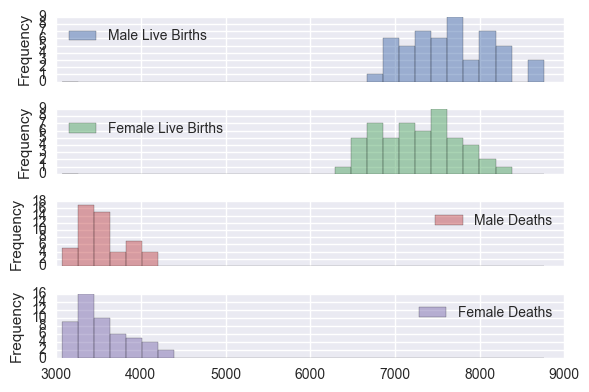

In [402]:
axes = mortality.plot(kind = 'hist', bins = 30, alpha = 0.5, subplots = True)
# an array of axes now get returned which you can access via indexing; axes[3] for example

plt.tight_layout()

### set layout = ( , ) and figsize = ( , ) to change layout and size

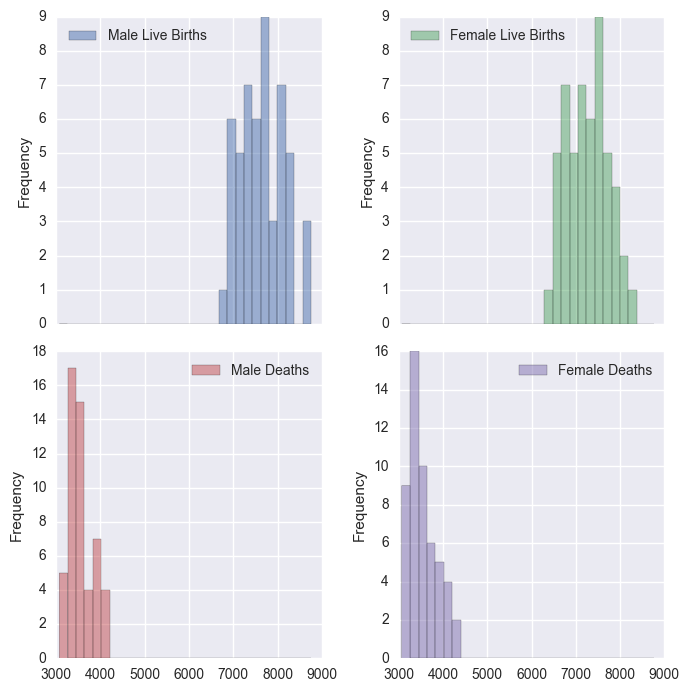

In [406]:
axes = mortality.plot(kind = 'hist', bins = 30, alpha = 0.5, subplots = True, layout = (2,2), figsize = (7,7))
# an matrix of axes now get returned which you can access via indexing; axes[1][0] for example

plt.tight_layout()

### hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a693978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b96a0f0>]], dtype=object)

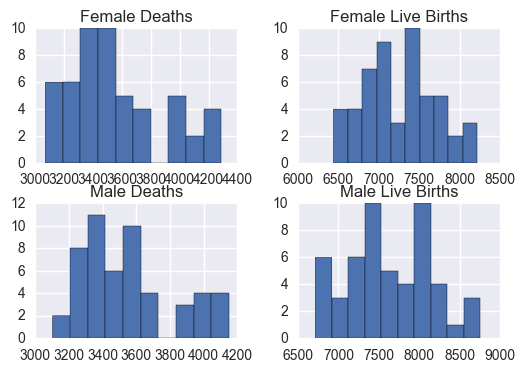

In [407]:
mortality.hist()

### use plt.subplots() to mix and match

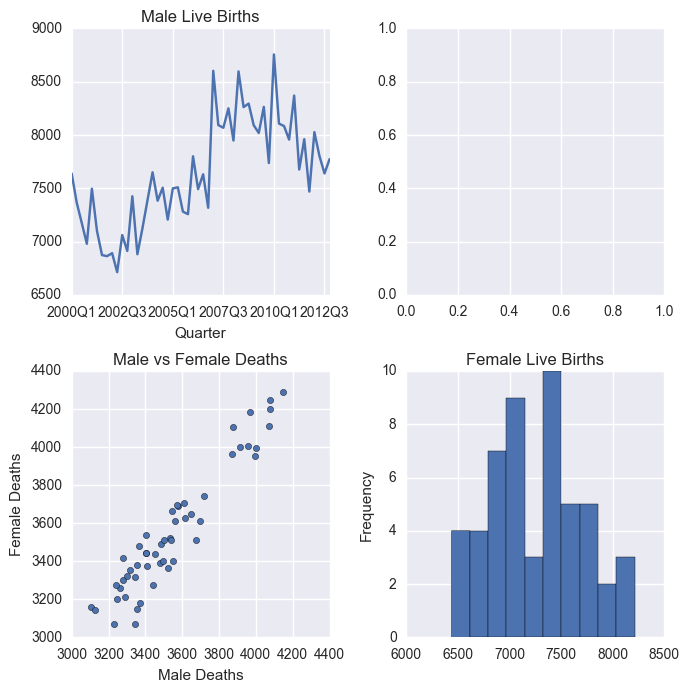

In [421]:
fig, axes = plt.subplots(2,2, figsize = (7,7))
mortality['Male Live Births'].plot(ax = axes[0][0], title = 'Male Live Births')
mortality['Female Live Births'].plot(kind = 'hist', ax = axes[1][1], title = 'Female Live Births')
mortality.plot(kind = 'scatter', x = 'Male Deaths', y = 'Female Deaths', title = 'Male vs Female Deaths',
              ax = axes[1][0])
plt.tight_layout()